In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install extra-keras-datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
from __future__ import print_function
import numpy as np 
from keras.datasets import mnist 
from extra_keras_datasets import emnist
from keras.utils import np_utils
np.random.seed(1671)  # for reproducibility
import tensorflow
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

**CHECKING ACCURACIES OF MODELS**

**MODEL 1 HAS CONV2D1(128 filters, (5,5) kernel size),CONV2D2(64 filters, (3,3) kernel size) Test accuracy=86.44%**

In [4]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

743915520/743900280 [==============================] - 77s 0us/step
X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [5]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [6]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [8]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

2022-02-08 12:11:23.268912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 12:11:23.370080: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 12:11:23.370979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 12:11:23.372117: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

2022-02-08 12:11:27.360820: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2


2022-02-08 12:11:28.682150: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


705/705 [==============================] - 12s 8ms/step - loss: 1.2258 - accuracy: 0.6385 - val_loss: 0.4714 - val_accuracy: 0.8388
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.6186 - accuracy: 0.8008 - val_loss: 0.3993 - val_accuracy: 0.8600
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4249 - accuracy: 0.8576

Test score: 0.42486947774887085
Test accuracy: 0.8575531840324402


In [10]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


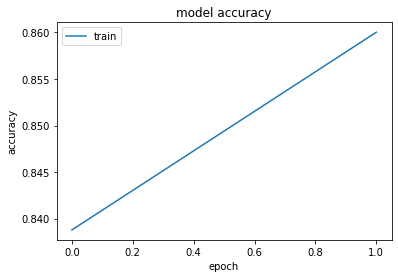

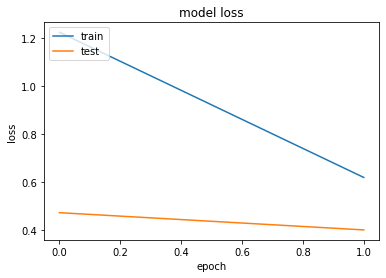

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**MODEL2 HAS CONV2D(32 filters, (3,3) kernel size) Test accuracy=85.29%**

In [12]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [13]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [14]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               3211776   
_________________________________________________________________
activation_1 (Activation)    (None, 512)              

In [17]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 4s 5ms/step - loss: 0.9116 - accuracy: 0.7258 - val_loss: 0.5022 - val_accuracy: 0.8316
Epoch 2/2
705/705 [==============================] - 3s 4ms/step - loss: 0.4655 - accuracy: 0.8437 - val_loss: 0.4355 - val_accuracy: 0.8495
Testing...
147/147 [==============================] - 0s 3ms/step - loss: 0.4628 - accuracy: 0.8464

Test score: 0.4628032147884369
Test accuracy: 0.8464361429214478


In [18]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


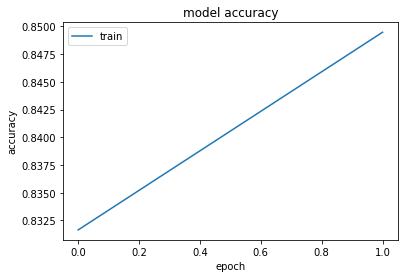

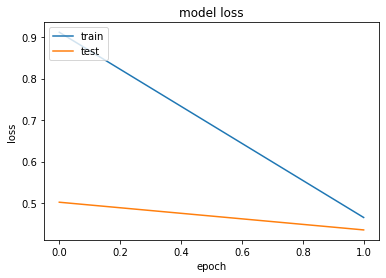

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [21]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(28, 28, 1)))

# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(47, activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [23]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 5s 7ms/step - loss: 1.2679 - accuracy: 0.6317 - val_loss: 0.5189 - val_accuracy: 0.8258
Epoch 2/2
705/705 [==============================] - 4s 6ms/step - loss: 0.6885 - accuracy: 0.7832 - val_loss: 0.4437 - val_accuracy: 0.8470
Testing...
147/147 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.8445

Test score: 0.4684394598007202
Test accuracy: 0.8444680571556091


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


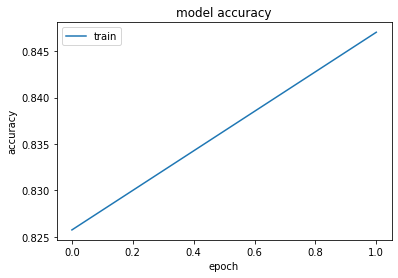

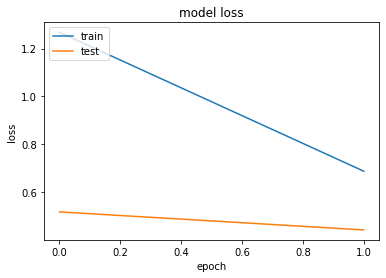

In [24]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [26]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(47, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)             

In [28]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 5s 7ms/step - loss: 0.6517 - accuracy: 0.7935 - val_loss: 0.3910 - val_accuracy: 0.8609
Epoch 2/2
705/705 [==============================] - 4s 6ms/step - loss: 0.3587 - accuracy: 0.8742 - val_loss: 0.3447 - val_accuracy: 0.8746
Testing...
147/147 [==============================] - 0s 3ms/step - loss: 0.3614 - accuracy: 0.8723

Test score: 0.3614102005958557
Test accuracy: 0.8723404407501221


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


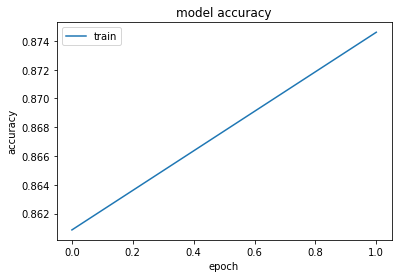

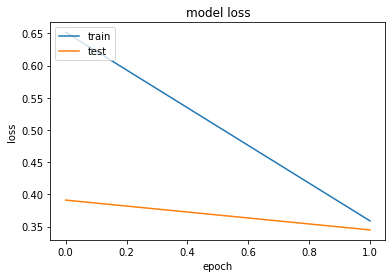

In [29]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [31]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [32]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(47))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)       

In [33]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 0.8898 - accuracy: 0.7279 - val_loss: 0.4073 - val_accuracy: 0.8557
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.4623 - accuracy: 0.8442 - val_loss: 0.3753 - val_accuracy: 0.8646
Testing...
147/147 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8630

Test score: 0.39617055654525757
Test accuracy: 0.8630319237709045


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


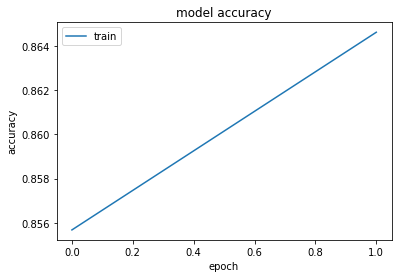

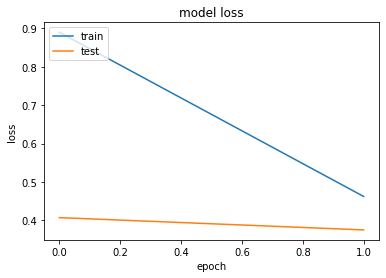

In [34]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [36]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [37]:
model = Sequential()
model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(47))
model.add(Activation('softmax'))

In [38]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 4s 5ms/step - loss: 1.4925 - accuracy: 0.6328 - val_loss: 0.7793 - val_accuracy: 0.7647
Epoch 2/2
705/705 [==============================] - 3s 4ms/step - loss: 0.6453 - accuracy: 0.7988 - val_loss: 0.5573 - val_accuracy: 0.8205
Testing...
147/147 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.8150

Test score: 0.5844898819923401
Test accuracy: 0.8149999976158142


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


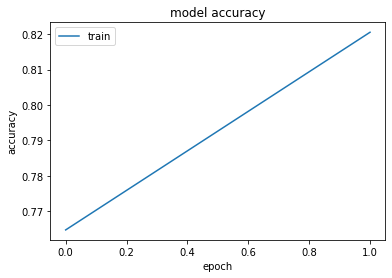

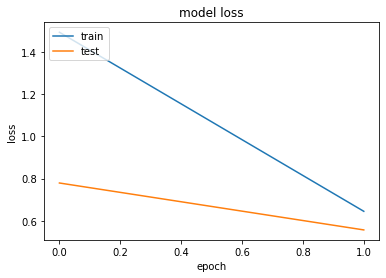

In [39]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [41]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(47, activation='softmax'))

In [43]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 9s 12ms/step - loss: 0.7500 - accuracy: 0.7735 - val_loss: 0.4462 - val_accuracy: 0.8470
Epoch 2/2
705/705 [==============================] - 8s 12ms/step - loss: 0.3622 - accuracy: 0.8733 - val_loss: 0.3784 - val_accuracy: 0.8672
Testing...
147/147 [==============================] - 1s 5ms/step - loss: 0.3992 - accuracy: 0.8648

Test score: 0.3992084562778473
Test accuracy: 0.8648404479026794


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


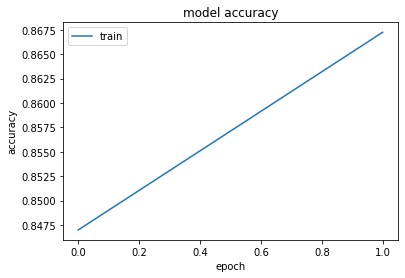

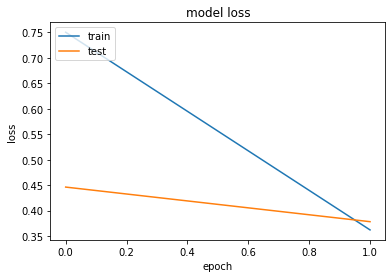

In [44]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**CHECKING ACCURACIES FOR DIFFERENT BATCH SIZES**

**32**

In [45]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [46]:
#constant
BATCH_SIZE = 32
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [47]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [48]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [49]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [50]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
2820/2820 [==============================] - 12s 4ms/step - loss: 0.9749 - accuracy: 0.7096 - val_loss: 0.4563 - val_accuracy: 0.8419
Epoch 2/2
2820/2820 [==============================] - 11s 4ms/step - loss: 0.5728 - accuracy: 0.8224 - val_loss: 0.4024 - val_accuracy: 0.8619
Testing...
588/588 [==============================] - 2s 4ms/step - loss: 0.4312 - accuracy: 0.8602

Test score: 0.43116652965545654
Test accuracy: 0.8601595759391785


In [51]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


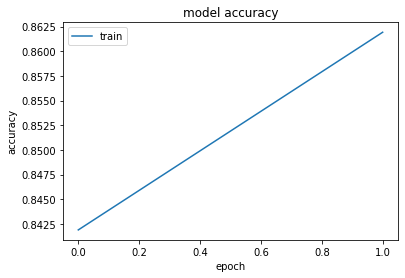

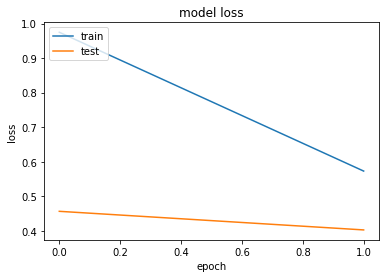

In [52]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**64**

In [53]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [54]:
#constant
BATCH_SIZE = 64
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [55]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [56]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [57]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)              

In [58]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
1410/1410 [==============================] - 8s 5ms/step - loss: 1.0702 - accuracy: 0.6810 - val_loss: 0.4596 - val_accuracy: 0.8410
Epoch 2/2
1410/1410 [==============================] - 7s 5ms/step - loss: 0.5781 - accuracy: 0.8158 - val_loss: 0.4121 - val_accuracy: 0.8545
Testing...
294/294 [==============================] - 1s 3ms/step - loss: 0.4345 - accuracy: 0.8522

Test score: 0.4345226585865021
Test accuracy: 0.8522340655326843


In [59]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


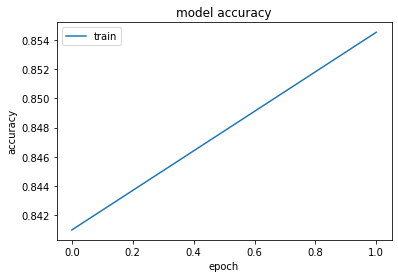

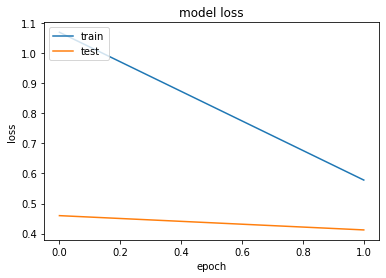

In [60]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**256**

In [61]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [62]:
#constant
BATCH_SIZE = 256
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [63]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [64]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [65]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [66]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
353/353 [==============================] - 5s 11ms/step - loss: 1.3463 - accuracy: 0.6081 - val_loss: 0.5238 - val_accuracy: 0.8212
Epoch 2/2
353/353 [==============================] - 4s 11ms/step - loss: 0.6817 - accuracy: 0.7814 - val_loss: 0.4402 - val_accuracy: 0.8438
Testing...
74/74 [==============================] - 0s 5ms/step - loss: 0.4630 - accuracy: 0.8401

Test score: 0.46303680539131165
Test accuracy: 0.8401063680648804


In [67]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


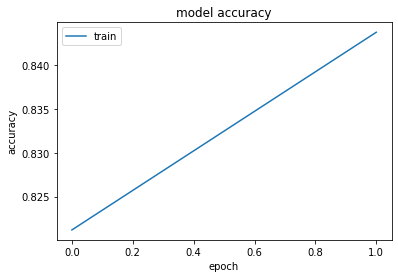

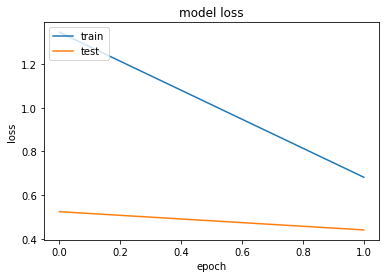

In [68]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**MODEL1 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.5**

* >**Batch size = 32  Accuracy = 85.468%**
* >**Batch size = 64  Accuracy = 85.446%**
* >**Batch size = 128 Accuracy = 86.44%**
* >**Batch size = 256 Accuracy = 84.76%**

**CHECKING ACCURACIES FOR DIFFERENT EPOCH SIZES W/ UPDATED MODEL1 AND BATCH_SIZE 128**

**10**

In [69]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [70]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 10
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [71]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [72]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [73]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)             

In [74]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/10
705/705 [==============================] - 6s 8ms/step - loss: 1.1647 - accuracy: 0.6575 - val_loss: 0.4922 - val_accuracy: 0.8311
Epoch 2/10
705/705 [==============================] - 5s 7ms/step - loss: 0.6029 - accuracy: 0.8062 - val_loss: 0.3984 - val_accuracy: 0.8596
Epoch 3/10
705/705 [==============================] - 5s 7ms/step - loss: 0.5074 - accuracy: 0.8342 - val_loss: 0.3761 - val_accuracy: 0.8687
Epoch 4/10
705/705 [==============================] - 5s 7ms/step - loss: 0.4563 - accuracy: 0.8502 - val_loss: 0.3590 - val_accuracy: 0.8730
Epoch 5/10
705/705 [==============================] - 5s 7ms/step - loss: 0.4338 - accuracy: 0.8572 - val_loss: 0.3557 - val_accuracy: 0.8730
Epoch 6/10
705/705 [==============================] - 5s 7ms/step - loss: 0.4235 - accuracy: 0.8623 - val_loss: 0.3479 - val_accuracy: 0.8754
Epoch 7/10
705/705 [==============================] - 5s 7ms/step - loss: 0.4187 - accuracy: 0.8642 - val_loss: 0.3509 - val_accuracy: 0.8789
Epoch 

In [75]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


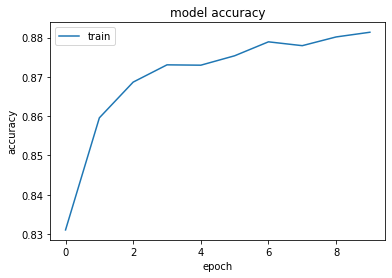

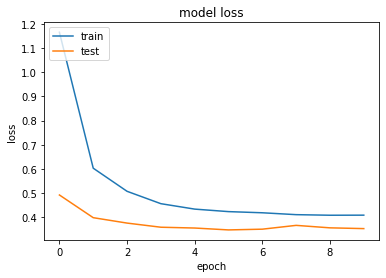

In [76]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**20**

In [77]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [78]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [79]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [80]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [81]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)             

In [82]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
705/705 [==============================] - 6s 7ms/step - loss: 1.2028 - accuracy: 0.6470 - val_loss: 0.4642 - val_accuracy: 0.8387
Epoch 2/20
705/705 [==============================] - 5s 7ms/step - loss: 0.6104 - accuracy: 0.8036 - val_loss: 0.3935 - val_accuracy: 0.8586
Epoch 3/20
705/705 [==============================] - 5s 7ms/step - loss: 0.5123 - accuracy: 0.8329 - val_loss: 0.3613 - val_accuracy: 0.8701
Epoch 4/20
705/705 [==============================] - 5s 7ms/step - loss: 0.4662 - accuracy: 0.8467 - val_loss: 0.3663 - val_accuracy: 0.8713
Epoch 5/20
705/705 [==============================] - 5s 7ms/step - loss: 0.4428 - accuracy: 0.8536 - val_loss: 0.3529 - val_accuracy: 0.8738
Epoch 6/20
705/705 [==============================] - 5s 7ms/step - loss: 0.4310 - accuracy: 0.8598 - val_loss: 0.3585 - val_accuracy: 0.8771
Epoch 7/20
705/705 [==============================] - 5s 7ms/step - loss: 0.4211 - accuracy: 0.8626 - val_loss: 0.4502 - val_accuracy: 0.8711
Epoch 

In [83]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


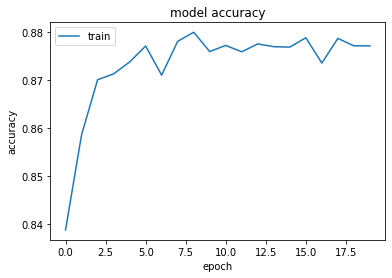

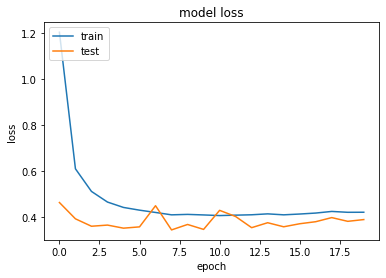

In [84]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**30**

In [85]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [86]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 30
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [87]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [88]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [89]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)             

In [90]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/30
705/705 [==============================] - 6s 7ms/step - loss: 1.1554 - accuracy: 0.6610 - val_loss: 0.4596 - val_accuracy: 0.8380
Epoch 2/30
705/705 [==============================] - 5s 7ms/step - loss: 0.5970 - accuracy: 0.8078 - val_loss: 0.4058 - val_accuracy: 0.8582
Epoch 3/30
705/705 [==============================] - 5s 7ms/step - loss: 0.5024 - accuracy: 0.8350 - val_loss: 0.3677 - val_accuracy: 0.8696
Epoch 4/30
705/705 [==============================] - 5s 7ms/step - loss: 0.4595 - accuracy: 0.8494 - val_loss: 0.3585 - val_accuracy: 0.8718
Epoch 5/30
705/705 [==============================] - 5s 7ms/step - loss: 0.4342 - accuracy: 0.8573 - val_loss: 0.3512 - val_accuracy: 0.8711
Epoch 6/30
705/705 [==============================] - 5s 7ms/step - loss: 0.4219 - accuracy: 0.8626 - val_loss: 0.3427 - val_accuracy: 0.8776
Epoch 7/30
705/705 [==============================] - 5s 7ms/step - loss: 0.4146 - accuracy: 0.8641 - val_loss: 0.3600 - val_accuracy: 0.8776
Epoch 

In [91]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


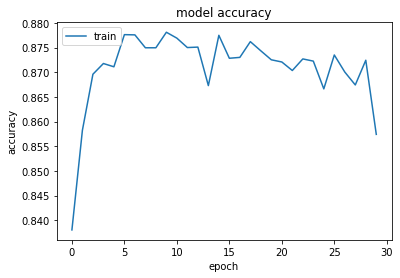

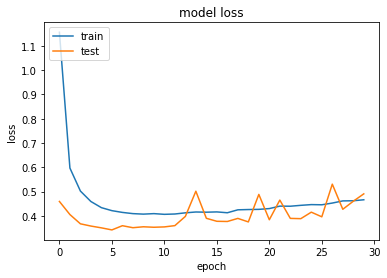

In [92]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**40**

In [93]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [94]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [95]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [96]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [97]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)             

In [98]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/40
705/705 [==============================] - 6s 7ms/step - loss: 1.1838 - accuracy: 0.6490 - val_loss: 0.4714 - val_accuracy: 0.8365
Epoch 2/40
705/705 [==============================] - 5s 7ms/step - loss: 0.6088 - accuracy: 0.8035 - val_loss: 0.4047 - val_accuracy: 0.8562
Epoch 3/40
705/705 [==============================] - 5s 7ms/step - loss: 0.5093 - accuracy: 0.8335 - val_loss: 0.3698 - val_accuracy: 0.8698
Epoch 4/40
705/705 [==============================] - 5s 7ms/step - loss: 0.4739 - accuracy: 0.8454 - val_loss: 0.3637 - val_accuracy: 0.8709
Epoch 5/40
705/705 [==============================] - 5s 7ms/step - loss: 0.4478 - accuracy: 0.8527 - val_loss: 0.3552 - val_accuracy: 0.8743
Epoch 6/40
705/705 [==============================] - 5s 7ms/step - loss: 0.4305 - accuracy: 0.8600 - val_loss: 0.3592 - val_accuracy: 0.8758
Epoch 7/40
705/705 [==============================] - 5s 7ms/step - loss: 0.4258 - accuracy: 0.8622 - val_loss: 0.3517 - val_accuracy: 0.8769
Epoch 

In [99]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


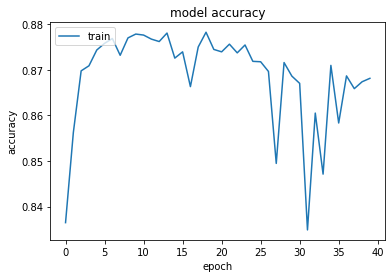

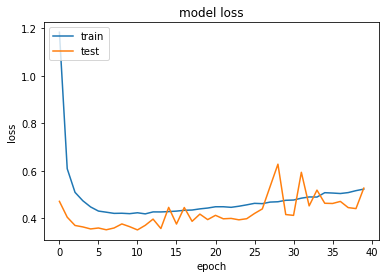

In [100]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**50**

In [101]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [102]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 50
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [103]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [104]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [105]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)             

In [106]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/50
705/705 [==============================] - 6s 7ms/step - loss: 1.1895 - accuracy: 0.6497 - val_loss: 0.4694 - val_accuracy: 0.8388
Epoch 2/50
705/705 [==============================] - 5s 7ms/step - loss: 0.6021 - accuracy: 0.8061 - val_loss: 0.4105 - val_accuracy: 0.8567
Epoch 3/50
705/705 [==============================] - 5s 7ms/step - loss: 0.5042 - accuracy: 0.8351 - val_loss: 0.3625 - val_accuracy: 0.8689
Epoch 4/50
705/705 [==============================] - 5s 7ms/step - loss: 0.4600 - accuracy: 0.8481 - val_loss: 0.3623 - val_accuracy: 0.8685
Epoch 5/50
705/705 [==============================] - 5s 7ms/step - loss: 0.4362 - accuracy: 0.8571 - val_loss: 0.3571 - val_accuracy: 0.8728
Epoch 6/50
705/705 [==============================] - 5s 7ms/step - loss: 0.4269 - accuracy: 0.8607 - val_loss: 0.3600 - val_accuracy: 0.8775
Epoch 7/50
705/705 [==============================] - 6s 8ms/step - loss: 0.4162 - accuracy: 0.8654 - val_loss: 0.4230 - val_accuracy: 0.8762
Epoch 

In [107]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


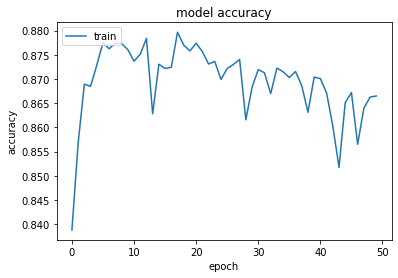

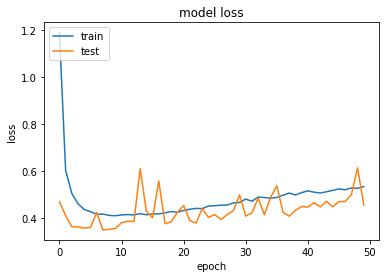

In [108]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.5**

* >**Epochs = 2  Test Accuracy = 86.44%**
* >**Epochs = 10 Test Accuracy = 87.96%**
* >**Epochs = 20 Test Accuracy = 87.19%** 
* >**Epochs = 30 Test Accuracy = 86.64%**
* >**Epochs = 40 Test Accuracy = 84.77%**
* >**Epochs = 50 Test Accuracy = 85.42%**

**CHECKING ACCURACIES FOR DIFFERENT VALIDATION_SPLIT**

**0.1**

In [109]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [110]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.1
OPTIM = RMSprop()

In [111]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [112]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [113]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)             

In [114]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
794/794 [==============================] - 6s 7ms/step - loss: 1.1388 - accuracy: 0.6641 - val_loss: 0.4981 - val_accuracy: 0.8259
Epoch 2/2
794/794 [==============================] - 5s 7ms/step - loss: 0.5886 - accuracy: 0.8086 - val_loss: 0.4169 - val_accuracy: 0.8564
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4304 - accuracy: 0.8573

Test score: 0.4304117262363434
Test accuracy: 0.8573404550552368


In [115]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


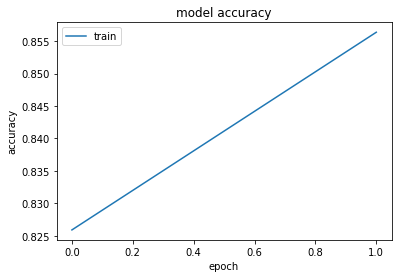

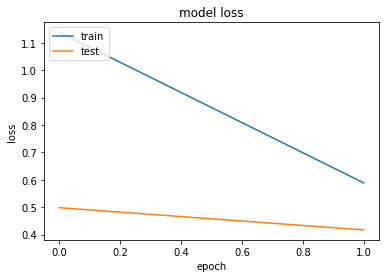

In [116]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.3**

In [117]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [118]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.3
OPTIM = RMSprop()

In [119]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [120]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [121]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)             

In [122]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
617/617 [==============================] - 6s 9ms/step - loss: 1.2115 - accuracy: 0.6449 - val_loss: 0.4877 - val_accuracy: 0.8347
Epoch 2/2
617/617 [==============================] - 5s 8ms/step - loss: 0.6183 - accuracy: 0.8009 - val_loss: 0.4109 - val_accuracy: 0.8541
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4336 - accuracy: 0.8545

Test score: 0.43364518880844116
Test accuracy: 0.8545212745666504


In [123]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


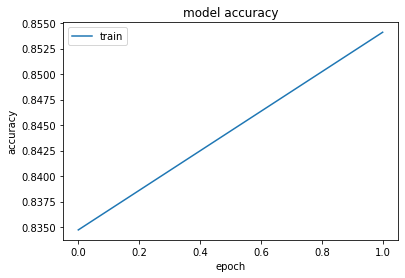

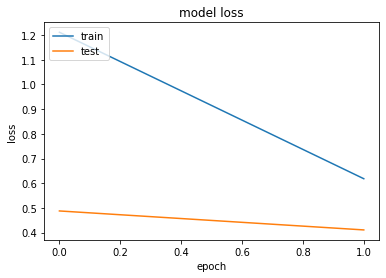

In [124]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.4**

In [125]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [126]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.4
OPTIM = RMSprop()

In [127]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [128]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [129]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)             

In [130]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
529/529 [==============================] - 5s 9ms/step - loss: 1.3114 - accuracy: 0.6182 - val_loss: 0.5176 - val_accuracy: 0.8274
Epoch 2/2
529/529 [==============================] - 5s 9ms/step - loss: 0.6629 - accuracy: 0.7892 - val_loss: 0.4359 - val_accuracy: 0.8480
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4580 - accuracy: 0.8478

Test score: 0.45798245072364807
Test accuracy: 0.8478191494941711


In [131]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


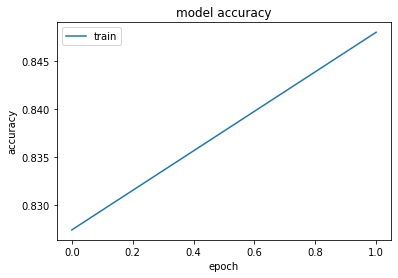

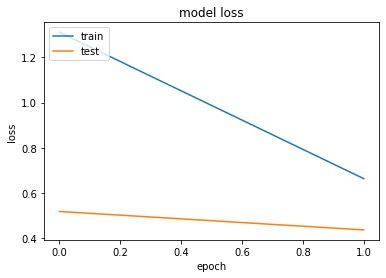

In [132]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.5**

In [133]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [134]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.5
OPTIM = RMSprop()

In [135]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [136]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [137]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)             

In [138]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
441/441 [==============================] - 6s 14ms/step - loss: 1.4132 - accuracy: 0.5929 - val_loss: 0.5588 - val_accuracy: 0.8134
Epoch 2/2
441/441 [==============================] - 4s 10ms/step - loss: 0.7122 - accuracy: 0.7706 - val_loss: 0.4559 - val_accuracy: 0.8432
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4738 - accuracy: 0.8427

Test score: 0.4738278090953827
Test accuracy: 0.8427127599716187


In [139]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


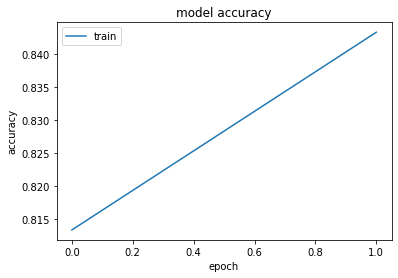

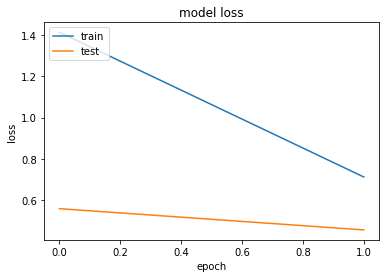

In [140]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.5**

* > **Validation_split = 0.1 Test Accuracy = 84.18%**
* > **Validation_split = 0.2 Test Accuracy = 86.44%**
* > **Validation_split = 0.3 Test Accuracy = 85.57**
* > **Validation_split = 0.4 Test Accuracy = 84.84**
* > **Validation_split = 0.5 Test Accuracy = 84.43**

**ACCURACIES FOR DIFFERENT OPTIMS WITH MODEL1, BATCH_SIZE=128, VALIDATION_SPLIT=0.2 EPOCH=2**

**Adam()**

In [141]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [142]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

In [143]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [144]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [145]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)             

In [146]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 5s 7ms/step - loss: 1.2441 - accuracy: 0.6326 - val_loss: 0.4826 - val_accuracy: 0.8332
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.6688 - accuracy: 0.7830 - val_loss: 0.4126 - val_accuracy: 0.8531
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4344 - accuracy: 0.8534

Test score: 0.43440335988998413
Test accuracy: 0.8534042835235596


In [147]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


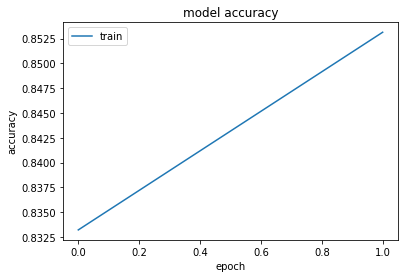

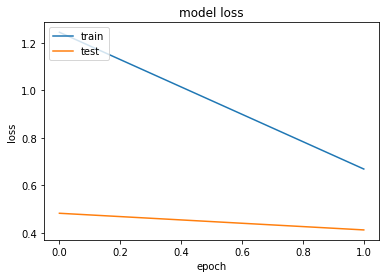

In [148]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**SGD()**

In [149]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [150]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = SGD()

In [151]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [152]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [153]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)             

In [154]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 5s 7ms/step - loss: 3.2999 - accuracy: 0.1526 - val_loss: 1.8986 - val_accuracy: 0.5150
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 2.0046 - accuracy: 0.4391 - val_loss: 1.3187 - val_accuracy: 0.6402
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 1.3347 - accuracy: 0.6351

Test score: 1.3347370624542236
Test accuracy: 0.6350532174110413


In [155]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


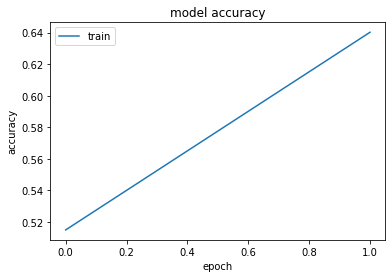

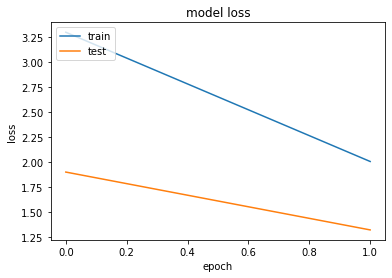

In [156]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 Dropout=0.5**

* >**RMSprop() Test accuracy = 86.44%**
* >**Adam()    Test accuracy = 85.71%**
* >**SGD()     Test accuracy = 64.27%**

**CHECKING ACCURACIES FOR DIFFERENT DROPOUT SIZES**

**0.1**

In [157]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [158]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [159]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [160]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [161]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)             

In [162]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 0.7909 - accuracy: 0.7563 - val_loss: 0.4557 - val_accuracy: 0.8427
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.4219 - accuracy: 0.8550 - val_loss: 0.3756 - val_accuracy: 0.8638
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.3933 - accuracy: 0.8639

Test score: 0.3932708501815796
Test accuracy: 0.863936185836792


In [163]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


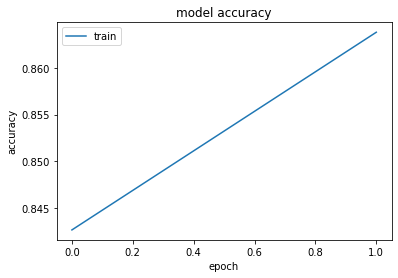

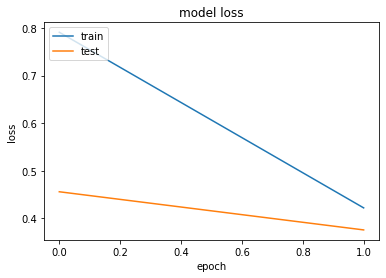

In [164]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.2**

In [165]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [166]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [167]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [168]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [169]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)             

In [170]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 0.8983 - accuracy: 0.7272 - val_loss: 0.4525 - val_accuracy: 0.8450
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.4615 - accuracy: 0.8448 - val_loss: 0.3765 - val_accuracy: 0.8650
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.3940 - accuracy: 0.8647

Test score: 0.39395344257354736
Test accuracy: 0.8647340536117554


In [171]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


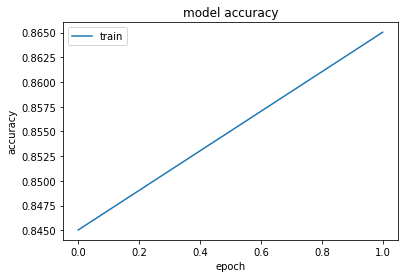

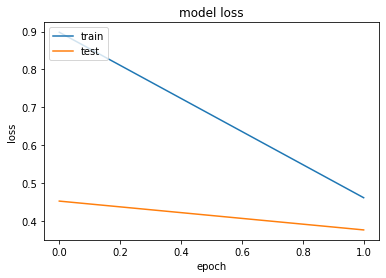

In [172]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.3**

In [173]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [174]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [175]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [176]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [177]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)             

In [178]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 0.9285 - accuracy: 0.7176 - val_loss: 0.4504 - val_accuracy: 0.8459
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.4816 - accuracy: 0.8394 - val_loss: 0.3859 - val_accuracy: 0.8637
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4090 - accuracy: 0.8603

Test score: 0.408956915140152
Test accuracy: 0.8602659702301025


In [179]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


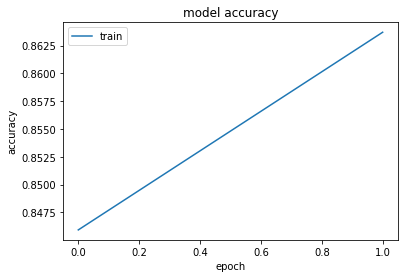

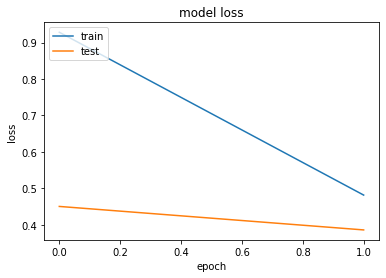

In [180]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.4**

In [181]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [182]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [183]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [184]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [185]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)             

In [186]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 1.0345 - accuracy: 0.6901 - val_loss: 0.4844 - val_accuracy: 0.8324
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.5422 - accuracy: 0.8249 - val_loss: 0.4000 - val_accuracy: 0.8573
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4238 - accuracy: 0.8570

Test score: 0.4238277077674866
Test accuracy: 0.856968104839325


In [187]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


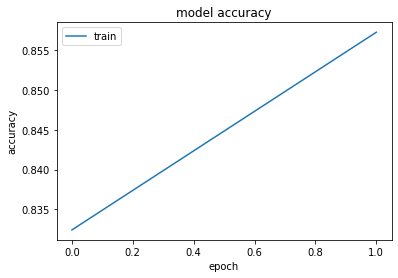

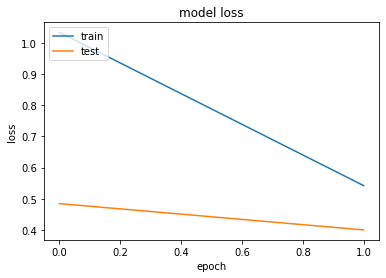

In [188]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.6**

In [189]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [190]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [191]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [192]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [193]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.6))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)             

In [194]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 1.3464 - accuracy: 0.6089 - val_loss: 0.4864 - val_accuracy: 0.8331
Epoch 2/2
705/705 [==============================] - 5s 8ms/step - loss: 0.6938 - accuracy: 0.7807 - val_loss: 0.4089 - val_accuracy: 0.8546
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4346 - accuracy: 0.8551

Test score: 0.43457677960395813
Test accuracy: 0.855053186416626


In [195]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


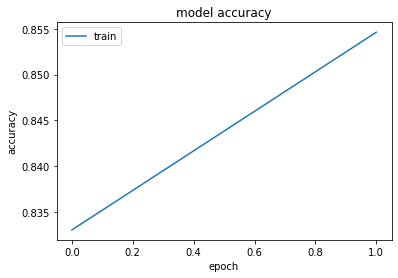

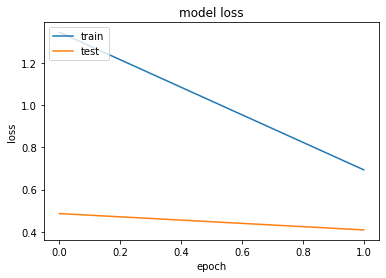

In [196]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.7**

In [197]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [198]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [199]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [200]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [201]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.7))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)             

In [202]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 8ms/step - loss: 1.6111 - accuracy: 0.5346 - val_loss: 0.5323 - val_accuracy: 0.8206
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.8786 - accuracy: 0.7260 - val_loss: 0.4364 - val_accuracy: 0.8506
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4615 - accuracy: 0.8483

Test score: 0.46151500940322876
Test accuracy: 0.8482978940010071


In [203]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


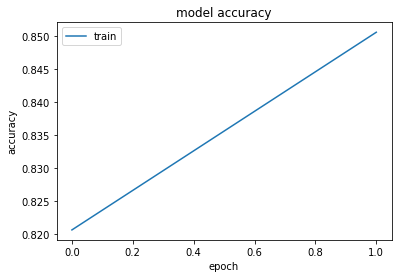

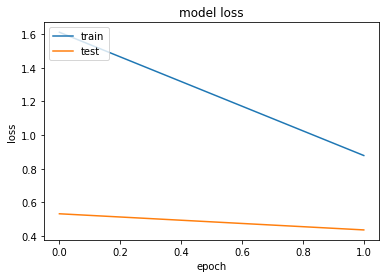

In [204]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.8**

In [205]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [206]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [207]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [208]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [209]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)             

In [210]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 2.0140 - accuracy: 0.4231 - val_loss: 0.5857 - val_accuracy: 0.8102
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 1.1959 - accuracy: 0.6229 - val_loss: 0.4720 - val_accuracy: 0.8361
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4977 - accuracy: 0.8314

Test score: 0.49774569272994995
Test accuracy: 0.8314361572265625


In [211]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


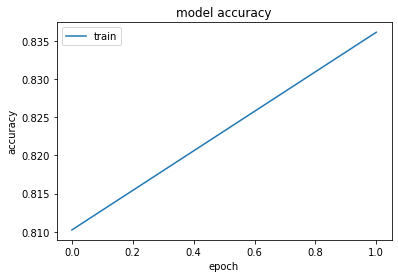

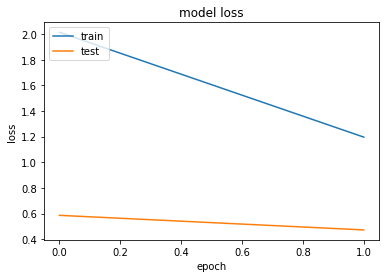

In [212]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.9**

In [213]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [214]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [215]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [216]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [217]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.9))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)             

In [218]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 2.8424 - accuracy: 0.2090 - val_loss: 1.1000 - val_accuracy: 0.7819
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 2.0717 - accuracy: 0.3545 - val_loss: 0.7656 - val_accuracy: 0.8058
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.7810 - accuracy: 0.8045

Test score: 0.7809834480285645
Test accuracy: 0.8044680953025818


In [219]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


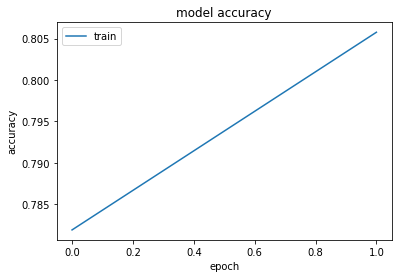

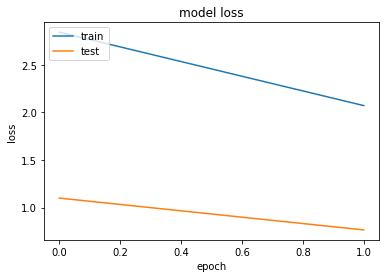

In [220]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop()**

* >**Dropout=0.1 Test Accuracy=86.68%**
* >**Dropout=0.2 Test Accuracy=86.42%**
* >**Dropout=0.3 Test Accuracy=86.10%**
* >**Dropout=0.4 Test Accuracy=85.64%**
* >**Dropout=0.5 Test Accuracy=86.44%**
* >**Dropout=0.6 Test Accuracy=85.60%**
* >**Dropout=0.7 Test Accuracy=84.55**
* >**Dropout=0.8 Test Accuracy=83.30%**
* >**Dropout=0.9 Test Accuracy=80.79%**

**FINAL MODEL > CONV2D1(128 filters, (5,5) kernel size),CONV2D2(64 filters, (3,3) kernel size) 128 BATCH SIZE 10 EPOCH VALIDATION_SPLIT=0.2 RMSprop() Dropout=0.1**

In [221]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [222]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 10
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [223]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [224]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [225]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)             

In [226]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/10
705/705 [==============================] - 6s 7ms/step - loss: 0.8306 - accuracy: 0.7469 - val_loss: 0.4308 - val_accuracy: 0.8480
Epoch 2/10
705/705 [==============================] - 5s 7ms/step - loss: 0.4238 - accuracy: 0.8555 - val_loss: 0.3870 - val_accuracy: 0.8614
Epoch 3/10
705/705 [==============================] - 5s 7ms/step - loss: 0.3561 - accuracy: 0.8745 - val_loss: 0.3578 - val_accuracy: 0.8705
Epoch 4/10
705/705 [==============================] - 5s 7ms/step - loss: 0.3196 - accuracy: 0.8866 - val_loss: 0.3424 - val_accuracy: 0.8738
Epoch 5/10
705/705 [==============================] - 5s 7ms/step - loss: 0.2934 - accuracy: 0.8939 - val_loss: 0.3398 - val_accuracy: 0.8795
Epoch 6/10
705/705 [==============================] - 5s 8ms/step - loss: 0.2726 - accuracy: 0.9006 - val_loss: 0.3394 - val_accuracy: 0.8824
Epoch 7/10
705/705 [==============================] - 5s 7ms/step - loss: 0.2571 - accuracy: 0.9053 - val_loss: 0.3364 - val_accuracy: 0.8780
Epoch 

In [227]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


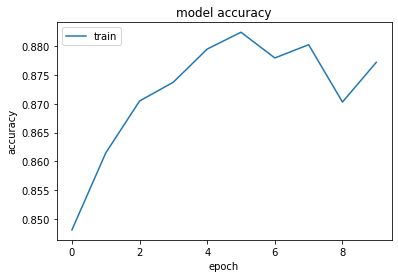

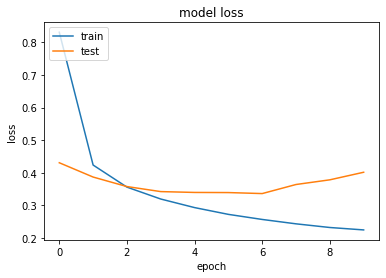

In [228]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [229]:
Model1="2CONV2Ds128filters5kernel"
Model2="Batch_size_128" 
Model3="Epoch10"  
Model4="Validation_split_0.2"
Model5="OPTIM=RMSprop()"
Model6="Dropout0.1"
Model7="FINAL" 

Train_accuracy1=85.60
Train_accuracy2=85.60
Train_accuracy3=87.59
Train_accuracy4=85.60
Train_accuracy5=85.60
Train_accuracy6=86.62
Train_accuracy7=87.82

Validation_accuracy1=85.96
Validation_accuracy2=85.96
Validation_accuracy3=87.73
Validation_accuracy4=85.96
Validation_accuracy5=85.96
Validation_accuracy6=86.59
Validation_accuracy7=87.58

Test_accuracy1=86.44 
Test_accuracy2=86.44
Test_accuracy3=87.85
Test_accuracy4=86.44
Test_accuracy5=86.44
Test_accuracy6=86.68
Test_accuracy7=87.82

In [230]:
info = {'SNO.':[1,2,3,4,5,6,7],'Model':[Model1,Model2,Model3,Model4,Model5,Model6,Model7], 'Train accuracy':[Train_accuracy1,Train_accuracy2,Train_accuracy3,Train_accuracy4,Train_accuracy5,Train_accuracy6,Train_accuracy7], 'Validation accuracy':[Validation_accuracy1,Validation_accuracy2,Validation_accuracy3,Validation_accuracy4,Validation_accuracy5,Validation_accuracy6,Validation_accuracy7],'Test accuracy':[Test_accuracy1,Test_accuracy2,Test_accuracy3,Test_accuracy4,Test_accuracy5,Test_accuracy6,Test_accuracy7]}

In [231]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [232]:
from tabulate import tabulate

In [233]:
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=range(1,8)))

╒════╤════════╤═══════════════════════════╤══════════════════╤═══════════════════════╤═════════════════╕
│    │   SNO. │ Model                     │   Train accuracy │   Validation accuracy │   Test accuracy │
╞════╪════════╪═══════════════════════════╪══════════════════╪═══════════════════════╪═════════════════╡
│  1 │      1 │ 2CONV2Ds128filters5kernel │            85.6  │                 85.96 │           86.44 │
├────┼────────┼───────────────────────────┼──────────────────┼───────────────────────┼─────────────────┤
│  2 │      2 │ Batch_size_128            │            85.6  │                 85.96 │           86.44 │
├────┼────────┼───────────────────────────┼──────────────────┼───────────────────────┼─────────────────┤
│  3 │      3 │ Epoch10                   │            87.59 │                 87.73 │           87.85 │
├────┼────────┼───────────────────────────┼──────────────────┼───────────────────────┼─────────────────┤
│  4 │      4 │ Validation_split_0.2      │            

In [234]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [235]:
BATCH_SIZE = 128
NB_EPOCH = 50
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [236]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(47, activation='softmax'))
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 1024)              3212288   
_________________________________________________________________
dropout_32 (Dropout)         (None, 1024)            

In [237]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/50
705/705 [==============================] - 5s 6ms/step - loss: 0.6438 - accuracy: 0.7954 - val_loss: 0.3929 - val_accuracy: 0.8610
Epoch 2/50
705/705 [==============================] - 4s 6ms/step - loss: 0.3492 - accuracy: 0.8763 - val_loss: 0.3612 - val_accuracy: 0.8691
Epoch 3/50
705/705 [==============================] - 4s 6ms/step - loss: 0.2919 - accuracy: 0.8938 - val_loss: 0.3403 - val_accuracy: 0.8764
Epoch 4/50
705/705 [==============================] - 4s 6ms/step - loss: 0.2569 - accuracy: 0.9045 - val_loss: 0.3359 - val_accuracy: 0.8820
Epoch 5/50
705/705 [==============================] - 5s 7ms/step - loss: 0.2285 - accuracy: 0.9142 - val_loss: 0.3389 - val_accuracy: 0.8824
Epoch 6/50
705/705 [==============================] - 4s 6ms/step - loss: 0.2087 - accuracy: 0.9212 - val_loss: 0.3600 - val_accuracy: 0.8802
Epoch 7/50
705/705 [==============================] - 4s 6ms/step - loss: 0.1931 - accuracy: 0.9270 - val_loss: 0.3624 - val_accuracy: 0.8731
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


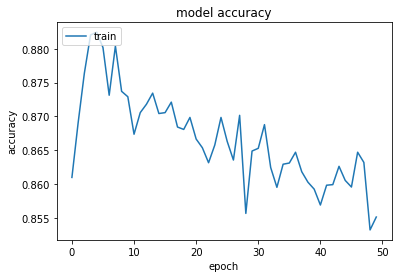

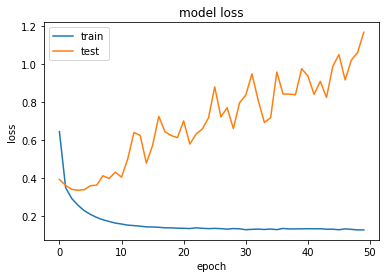

In [238]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
